# Assignment 5
### Do all four questions.

# Question 1

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [3]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [4]:
A@e_1

array([1, 4, 7])

If we think of the matrix columns as having x, y, z components (corresponding to each column), then the x component of each row of the matrix is selected in this vector multiplication. This makes sense, because the vector being multiplied is ```[1, 0, 0]```, which just selects for the x-components without scaling them:

```(1*1 + 0*2 + 0*3) = 1```  
```(1*4 + 0*5 + 0*6) = 4```     
```(1*7 + 0*8 + 0*9) = 7```  

In [5]:
A@e_2

array([2, 5, 8])

This vector multiplication is similar in nature to the first. The vector ```[0, 1, 0]``` selects for the Y-components (2nd feature) of the matrix without scaling it.

```(0*1 + 1*2 + 0*3) = 2```  
```(0*4 + 1*5 + 0*6) = 5```     
```(0*7 + 1*8 + 0*9) = 8```  

In [6]:
A@e_3

array([3, 6, 9])

The final vector multiplication selects for the 3rd component, the z-axis, without scaling any of the values.

```(0*1 + 0*2 + 1*3) = 3```  
```(0*4 + 0*5 + 1*6) = 6```     
```(0*7 + 0*8 + 1*9) = 9```  

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [7]:
u = np.ones(3)

In [8]:
A@u

array([ 6., 15., 24.])

The matrix multiplication definition shows that term in A<sub>i</sub> will be the sum of each x term in the first row, scaled by the positional equivalent in the vector. When the vector is ```[1, 1, 1]``` that means to simply sum all values in each row.

```(1*1 + 1*2 + 1*3) = 6```  
```(1*4 + 1*5 + 1*6) = 15```     
```(1*7 + 1*8 + 1*9) = 24```  

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [9]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])
A@x

array([-2,  4, 11])

The identity matrix returns the corresponding component for each row.

In the first row, only the first term is selected ```(-2*1 + 4*0 + 11*0) = -2```   
Likewise, only the second term is selected in the second row ```(-2*0 + 4*1 + 11*0) = 4```  
And lastly, only the third term is selected in the third row ```(-2*0 + 4*0 + 11*1) = 11```  

This simply returns the vector. It ain't called the identity matrix for nothin!

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [10]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])
A@x

array([11, -2,  4])

In [11]:
A = np.array([ [0,1,0],
              [1,0,0],
              [0,0,1]])
A@x

array([ 4, -2, 11])

Switching the 1s to different columns in the identity matrix means you select the x-y-z components out of order.

In the example I created above, I changed the identity matrix from Y --> X --> Z. So after multiplying by x, the resulting vector rearranges the dimensions.

In the first row, the second term is selected ```(-2*0 + 4*1 + 11*0) = 4```   
Likewise, only the first term is selected in the second row ```(-2*1 + 4*0 + 11*0) = -2```  
And in the third row, the last term is selected ```(-2*0 + 4*0 + 11*1) = 11``` 

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [12]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [13]:
print(A@e_1)
print(A@e_2)
print(A@e_3)

[0.50052958 0.02574731 0.47372311]
[0.24049286 0.39251588 0.36699127]
[0.18358131 0.37907577 0.43734292]


Each vector e_1, e_2, and e_3 selects for the <i>i</i> components of the matrix. The results of the vector multiplications are the proportions of transitions that each state 1, 2, 3 makes to the other states.

For example ```A@e_1``` yields the output ```[0.50052958 0.02574731 0.47372311]```. These are the transitions that state 1 makes to the other states, meaning that state1 goes to state1: ~50.1%, state2: 2.6%, and state3: 48.4% of the time.  

The next vectors yield similar outputs for state2 and state3, showing the frequency of their transitions to other states.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [14]:
print(A@A@A@A@A@e_1)
print(A@A@A@A@A@e_2)
print(A@A@A@A@A@e_3)

print(f"Average of columns: {np.mean(A,1)}")

[0.29266551 0.27862515 0.42870935]
[0.29197422 0.27979983 0.42822595]
[0.29171646 0.2802254  0.42805814]
Average of columns: [0.30820125 0.26577965 0.4260191 ]


The results are:

(5 times) A@e_1: ```[0.29266551 0.27862515 0.42870935]```  
(5 times) A@e_2: ```[0.29197422 0.27979983 0.42822595]```  
(5 times) A@e_3: ```[0.29171646 0.2802254  0.42805814]```  

All the vectors are converging on specific numbers that are close to the column means.

# Question 2

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [15]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

x = np.array([1, 0])

In [16]:
T@x

array([0.25, 0.75])

We start in state1, so the resulting array is the forecast of which state we will go to next. There is a 75% chance we go to state2 next, and 25% chance we stay on state1.

In [17]:
T@T@x

array([0.4375, 0.5625])

This is the forecast for the 3rd period: state1 (43.8%) versus state2 (56.3%). This second additional transformation shows the probability that we will be in state1/state2, after we take into account the odds of being in state1 (25%) and state2 (75%) after the first transformation.

In [18]:
print(T@T@T@x)
print(T@T@T@T@x)
print(T@T@T@T@T@T@T@x)
print(T@T@T@T@T@T@T@T@T@x)

[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39996338 0.60003662]
[0.39999771 0.60000229]


After about the 7th transformation it is within 1/1000th accuracy (assuming it is converging to ```[0.4, 0.6]```)

Here is the same analysis with vector y ```[0, 1]```. It converges to the same long-run result of ```[0.4, 0.6]```.

In [19]:
y = np.array([0, 1])
print(T@y)
print(T@T@y)
print(T@T@T@y)
print(T@T@T@T@T@T@T@T@T@y)

[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.40000153 0.59999847]


# Question 3

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [20]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('cville_weather.csv')
df.head()

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [22]:
df['rain'] = df['PRCP'] > 0
df['rain'].value_counts()

rain
False    232
True     179
Name: count, dtype: int64

In [23]:
sun_days = df.loc[df['rain'] == 0].index.to_list()
rain_days = df.loc[df['rain'] == 1].index.to_list()
len(sun_days) + len(rain_days) == len(df)

True

In [24]:
previously_sunny = []
for day in sun_days:
    try:
        previously_sunny.append(bool(df['rain'].iloc[day + 1]))
    except IndexError:
        pass
previously_sunny;

In [25]:
previously_rainy = []
for day in rain_days:
    try:
        previously_rainy.append(bool(df['rain'].iloc[day + 1]))
    except IndexError:
        pass
previously_rainy;

In [26]:
print(len(rain_days))
print(len(sun_days))
print(len(previously_rainy))
print(len(previously_sunny))

179
232
179
231


In [30]:
sun_after_sun = 1 - (sum(previously_sunny) / len(previously_sunny))
rain_after_sun = sum(previously_sunny) / len(previously_sunny)
sun_after_rain = 1 - (sum(previously_rainy) / len(previously_rainy))
rain_after_rain = sum(previously_rainy) / len(previously_rainy)

In [31]:
T = np.array([[ sun_after_sun, sun_after_rain],
                 [ rain_after_sun, rain_after_rain]])
print(T)

[[0.73160173 0.35195531]
 [0.26839827 0.64804469]]


According to the chain, if it was rainy yesterday, there is approximately a 65% chance it will rain the next day. If it was clear yesterday, there is about a 27% chance that it will rain the next day.

In [32]:
sunny_start = np.array([1, 0])
rainy_start = np.array([0, 1])

In [57]:
prob = T@sunny_start
for d in range(10):
    if np.random.choice([0, 1], p=prob) == 0:
        forecast = 'sunny'
        prob = T@sunny_start
    else:
        forecast = 'rainy'
        prob = T@rainy_start
    print(f'Day {d} forecast: {forecast}')

Day 0 forecast: sunny
Day 1 forecast: sunny
Day 2 forecast: sunny
Day 3 forecast: sunny
Day 4 forecast: rainy
Day 5 forecast: rainy
Day 6 forecast: rainy
Day 7 forecast: rainy
Day 8 forecast: rainy
Day 9 forecast: rainy


For a sunny start, the distribution of sun : rain converges to ```[0.5673463 0.4326537]```. It is within 0.5% by the 5th day.

In [58]:
print(T@sunny_start)
print(T@T@sunny_start)
print(T@T@T@sunny_start)
print(T@T@T@T@T@sunny_start)
print(T@T@T@T@T@T@T@T@T@T@T@T@sunny_start)
print(T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@sunny_start)

[0.73160173 0.26839827]
[0.62970529 0.37029471]
[0.59102067 0.40897933]
[0.57075852 0.42924148]
[0.56735018 0.43264982]
[0.5673463 0.4326537]


For a rainy start, the distribution converges to the same ratio of sun : rain ```[0.5673463 0.4326537]```. Similarly it is within 0.5% of the convergence number by the 5th day.

In [59]:
print(T@rainy_start)
print(T@T@rainy_start)
print(T@T@T@rainy_start)
print(T@T@T@T@T@rainy_start)
print(T@T@T@T@T@T@T@T@T@T@T@T@rainy_start)
print(T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@T@rainy_start)

[0.35195531 0.64804469]
[0.48557388 0.51442612]
[0.5363017 0.4636983]
[0.5628718 0.4371282]
[0.56734122 0.43265878]
[0.5673463 0.4326537]


In [ ]:
import seaborn as sns

In [73]:
after_rain = []
for d in rain_days:
    if d + 1 > len(df):
        pass
    after_rain.append(d+1)
after_rain

[1,
 2,
 3,
 4,
 6,
 7,
 9,
 10,
 12,
 23,
 24,
 25,
 30,
 36,
 37,
 40,
 43,
 44,
 45,
 50,
 53,
 54,
 55,
 56,
 57,
 62,
 66,
 71,
 72,
 76,
 77,
 79,
 80,
 81,
 83,
 84,
 85,
 87,
 89,
 90,
 95,
 96,
 97,
 98,
 102,
 115,
 123,
 129,
 131,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 149,
 150,
 153,
 154,
 155,
 156,
 163,
 166,
 168,
 169,
 184,
 185,
 186,
 187,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 199,
 202,
 206,
 207,
 209,
 211,
 212,
 214,
 215,
 217,
 219,
 220,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 274,
 277,
 281,
 282,
 289,
 299,
 303,
 304,
 305,
 306,
 308,
 309,
 311,
 318,
 321,
 336,
 340,
 341,
 345,
 347,
 363,
 364,
 365,
 368,
 369,
 370,
 371,
 372,
 373,
 375,
 376,
 377,
 378,
 379,
 

<Axes: xlabel='rain', ylabel='Density'>

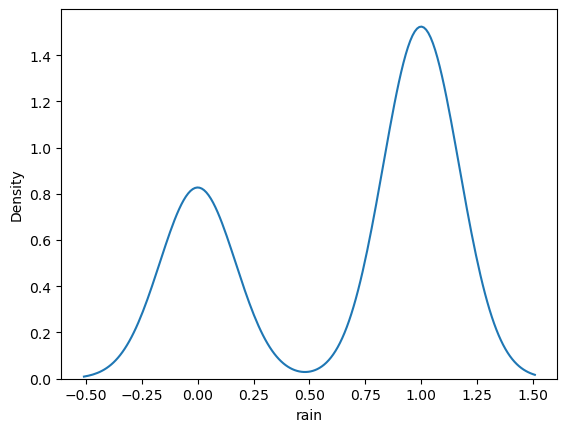

In [75]:
sns.kdeplot(df.loc[after_rain], x='rain')

To make the forecast better, I would consider extending the chain as conditional on more days. For example, what is the the predicted weather given the weather pattern the previous 3 days (rain, sun, sun // sun, sun, sun // sun, rain, rain, etc.). That might lead to more accurate predictions. It might also be interesting to categorize the rain outcomes from the initial data as light-rain, medium-rain, heavy-rain, since they are decimal point values from 0-1. I would have to double check the exact meaning of the decimal point - in some forecasts that refers to the % of land in an area that receives rain. The forecast could be made more meaningful by incorporating the magnitude of rain into the chain, and trying to predict the magnitude of rain the following day.

# Question 4

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [16]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
states = set()
for trip in data:
    new_states = set(trip)
    states = states.union(new_states)
states = list(states)

In [8]:
tr_counts = np.zeros((len(states), len(states)))

In [9]:
data[0]

0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
            ...        
29                 SoHo
29                 SoHo
13    Greenwich Village
3               Chelsea
3               Chelsea
Name: nbhd, Length: 26026, dtype: object

In [10]:
for cab in data:
    trips = np.array(cab)
    for t in range(1, len(trips)):
        # Current and next tokens:
        x_tm1 = trips[t-1] # previous state
        x_t = trips[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

print('Transition Counts:\n', tr_counts)

Transition Counts:
 [[1.864630e+05 1.063300e+04 1.009000e+03 ... 4.042000e+03 1.992820e+05
  1.100000e+01]
 [8.558000e+03 1.119300e+05 1.283000e+03 ... 1.009000e+03 5.293100e+04
  0.000000e+00]
 [8.700000e+02 1.465000e+03 5.493000e+03 ... 9.100000e+01 4.305000e+03
  0.000000e+00]
 ...
 [5.318000e+03 1.568000e+03 1.440000e+02 ... 4.658500e+04 1.464800e+04
  3.000000e+01]
 [1.838250e+05 4.287300e+04 3.941000e+03 ... 1.414400e+04 1.389343e+06
  3.600000e+01]
 [1.200000e+01 4.000000e+00 1.000000e+00 ... 1.400000e+01 2.900000e+01
  1.600000e+01]]


In [11]:
sums = tr_counts.sum(axis=0, keepdims=True)
sums

array([[8.740570e+05, 5.102590e+05, 5.791000e+04, 5.077810e+05,
        3.168450e+05, 4.086350e+05, 3.859100e+04, 1.200000e+01,
        1.000000e+00, 1.224335e+06, 3.000000e+00, 1.431100e+04,
        8.010000e+03, 8.886410e+05, 3.952900e+05, 1.978286e+06,
        1.058700e+05, 7.252200e+04, 1.803502e+06, 4.415730e+05,
        3.701250e+05, 6.544000e+05, 2.292350e+05, 1.038800e+04,
        2.797710e+06, 3.705730e+05, 5.505930e+05, 2.363902e+06,
        5.017520e+05, 1.627100e+05, 8.393600e+05, 3.603000e+03,
        1.112820e+05, 1.063810e+05, 1.743200e+05, 2.171460e+05,
        3.851989e+06, 4.930000e+02]])

In [12]:
tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where=sums!=0)

In [13]:
tr_df = pd.DataFrame(np.round(tr_pr, 4), index=states, columns=states)
tr_df

,Theater District,Greenwich Village,Civic Center,Kips Bay,East Harlem,Tribeca,Little Italy,Governors Island,Liberty Island,Hell's Kitchen,...,Gramercy,Morningside Heights,West Village,Randall's Island,Stuyvesant Town,Nolita,NoHo,Harlem,Midtown,Marble Hill
Theater District,0.2133,0.0208,0.0174,0.0193,0.0139,0.0191,0.0325,0.0000,0.0,0.0784,...,0.0163,0.0162,0.0211,0.0092,0.0148,0.0147,0.0149,0.0186,0.0517,0.0223
Greenwich Village,0.0098,0.2194,0.0222,0.0203,0.0047,0.0310,0.0297,0.0000,0.0,0.0099,...,0.0405,0.0043,0.0469,0.0025,0.0240,0.0356,0.0604,0.0046,0.0137,0.0000
Civic Center,0.0010,0.0029,0.0949,0.0014,0.0005,0.0103,0.0064,0.0000,0.0,0.0009,...,0.0019,0.0005,0.0020,0.0003,0.0016,0.0040,0.0036,0.0004,0.0011,0.0000
Kips Bay,0.0103,0.0182,0.0114,0.1927,0.0087,0.0086,0.0146,0.0000,0.0,0.0086,...,0.0622,0.0033,0.0123,0.0044,0.0909,0.0184,0.0253,0.0045,0.0244,0.0122
East Harlem,0.0056,0.0029,0.0036,0.0061,0.2270,0.0021,0.0026,0.0000,0.0,0.0056,...,0.0048,0.0310,0.0028,0.1651,0.0065,0.0031,0.0033,0.0704,0.0068,0.0345
Tribeca,0.0082,0.0195,0.1360,0.0064,0.0025,0.2496,0.0233,0.0000,0.0,0.0085,...,0.0107,0.0030,0.0278,0.0031,0.0074,0.0188,0.0195,0.0029,0.0070,0.0041
Little Italy,0.0010,0.0018,0.0114,0.0008,0.0002,0.0031,0.1015,0.0000,0.0,0.0007,...,0.0011,0.0002,0.0017,0.0000,0.0010,0.0071,0.0022,0.0002,0.0007,0.0000
Governors Island,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1667,0.0,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Liberty Island,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Hell's Kitchen,0.1174,0.0241,0.0162,0.0224,0.0186,0.0254,0.0262,0.0000,0.0,0.2829,...,0.0218,0.0381,0.0372,0.0119,0.0189,0.0186,0.0202,0.0410,0.0481,0.0751


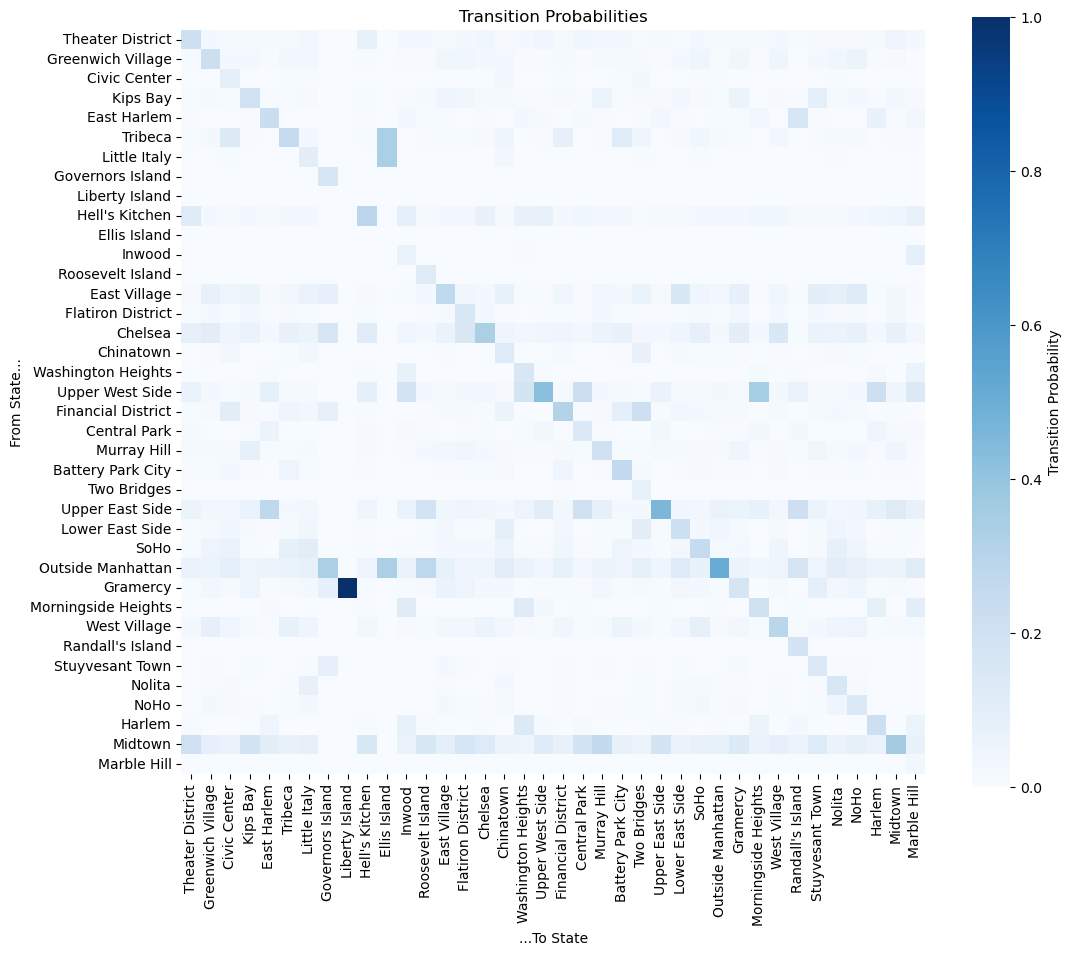

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In general, the diagonal is shaded slightly darker than the rest of the graph, meaning that cab rides tend towards staying in the same neighborhood. Some neighborhoods are more frequent originators of cab rides: Midtown, Upper west side, Upper east side, and Chelsea. Taxi drivers may head to these neighborhoods when they are nearby due to the higher likelihood of riders - which would account for the darker than average shades in the "From State".  
 
The darkest shade is a single ride from Gramercy to Liberty Island. I'm not sure how the driver made it across the river, but it was a one-time thing. Otherwise the Upper East side, Upper West Side, and Outside Manhattan have the darkest shades in the grid for their corresponding diagonal cells.

Taxi cab rides are most likely Order 1, and not a greater order, because the most recent ride determines where a taxi driver is before their next trip. The taxi driver is most likely to pick up riders close to their most recent trip - where they were prior to their most recent trip probably does not affect where they go next.  

For example, if a taxi driver takes someone from Midtown to Chinatown at 7pm when their workday ends, they are vastly more likely to pick up someone in one of the neighborhoods by Chinatown rather than driving 40 minutes back up to Midtown to pick up riders there.

In [18]:
state_to_idx = {s:i for i,s in enumerate(states)}
state_to_idx['Hell\'s Kitchen']

9

In [19]:
idx_to_state = {i:s for i,s in enumerate(states)}
idx_to_state[9]

"Hell's Kitchen"

In [20]:
starting_in_hk = np.array(np.zeros(38))
starting_in_hk[9] = 1
starting_in_hk

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

By the 5th ride, the taxi is most likely to end up in Midtown. The same top 3 holds for the 10th ride. All future forecasts converge to Midtown, Upper East Side, and Outside Manhattan as the top 3 most likely destinations.

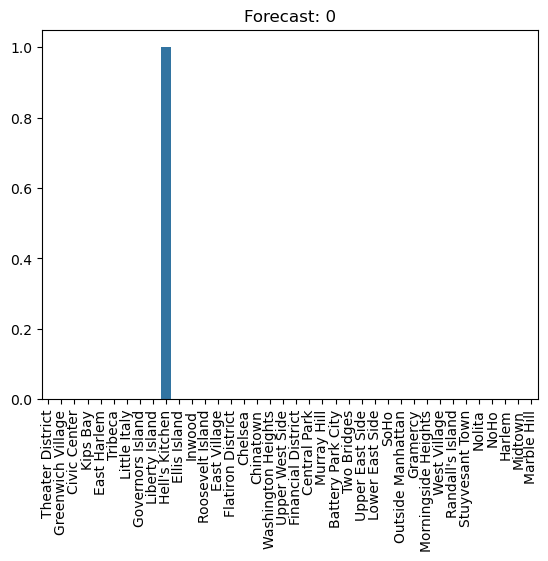

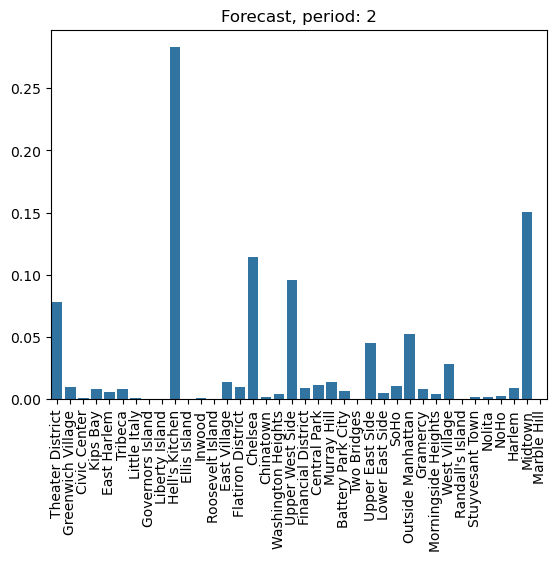

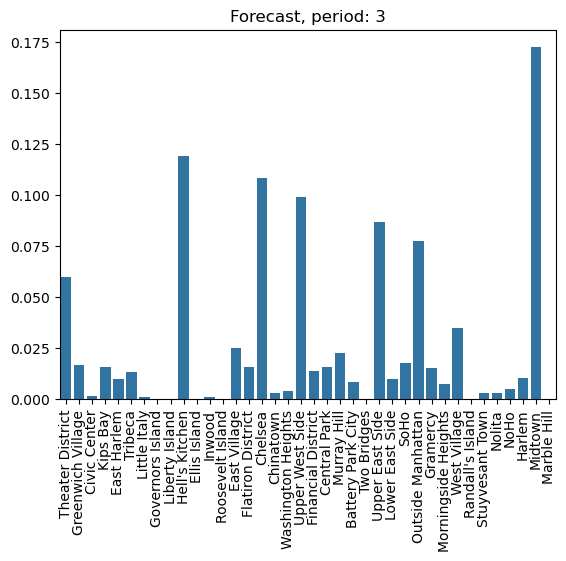

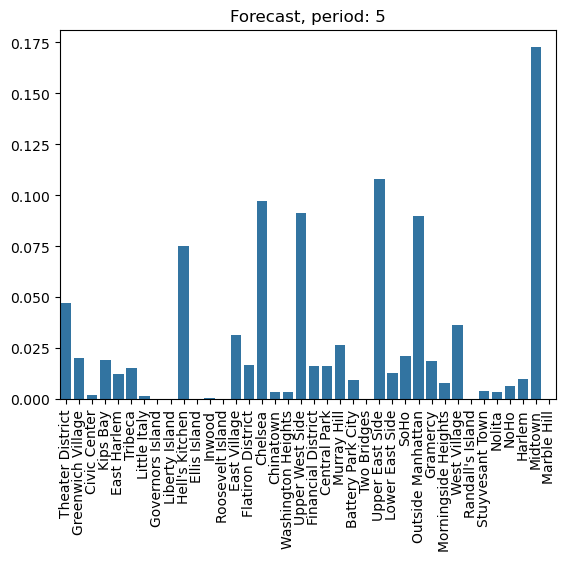

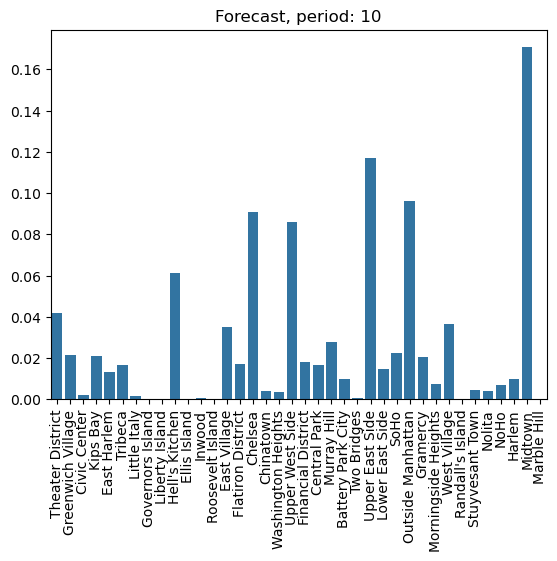

In [ ]:
initial_state = 'Hell\'s Kitchen' # Choose an initial state at random
state_index = states.index(initial_state) # Get the index of the initial state

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1

sns.barplot(x=states,y=density).set(title=f'Forecast: 0')
plt.xticks(rotation=90)
plt.show()

plotting_range = [1, 2, 4, 9]

forecast = [initial_state]
for t in plotting_range: 
    density = tr_pr @ density
    forecast.append(density) # Append new forecast
    sns.barplot(x=states,y=density).set(title=f'Forecast, period: {str(t+1)}')
    plt.xticks(rotation=90)
    plt.show()

In [31]:
def top_3(arr):
    top3_idx = np.argsort(arr)[-3:][::-1]
    top3_vals = arr[top3_idx]
    for i, idx in enumerate(top3_idx):
        print(f'Destination {i}: {idx_to_state[idx]} with {top3_vals[i]:.2%} likelihood')

In [34]:
print("Starting in Hell's Kitchen, the taxi's 2nd ride could end up: ")
top_3(tr_pr@starting_in_hk)
print('\n')
print("Starting in Hell's Kitchen, the taxi's 3rd ride could end up:")
top_3(tr_pr@tr_pr@starting_in_hk)
print('\n')
print("Starting in Hell's Kitchen, the taxi's 5th ride could end up:")
top_3(tr_pr@tr_pr@tr_pr@tr_pr@starting_in_hk)
print('\n')
print("Starting in Hell's Kitchen, the taxi's 10th ride could end up:")
top_3(tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@starting_in_hk)
print('\n')

Starting in Hell's Kitchen, the taxi's 2nd ride could end up: 
Destination 0: Hell's Kitchen with 28.29% likelihood
Destination 1: Midtown with 15.02% likelihood
Destination 2: Chelsea with 11.46% likelihood


Starting in Hell's Kitchen, the taxi's 3rd ride could end up:
Destination 0: Midtown with 17.25% likelihood
Destination 1: Hell's Kitchen with 11.92% likelihood
Destination 2: Chelsea with 10.87% likelihood


Starting in Hell's Kitchen, the taxi's 5th ride could end up:
Destination 0: Midtown with 17.07% likelihood
Destination 1: Upper East Side with 11.70% likelihood
Destination 2: Outside Manhattan with 9.62% likelihood


Starting in Hell's Kitchen, the taxi's 10th ride could end up:
Destination 0: Midtown with 16.79% likelihood
Destination 1: Upper East Side with 12.20% likelihood
Destination 2: Outside Manhattan with 10.27% likelihood




A random choice selected Liberty Island(!) as the starting point. The forecast shape is pretty much set by taxi ride #4, and the magnitudes of the likelihood do not change much at all between trips #4 and #5.

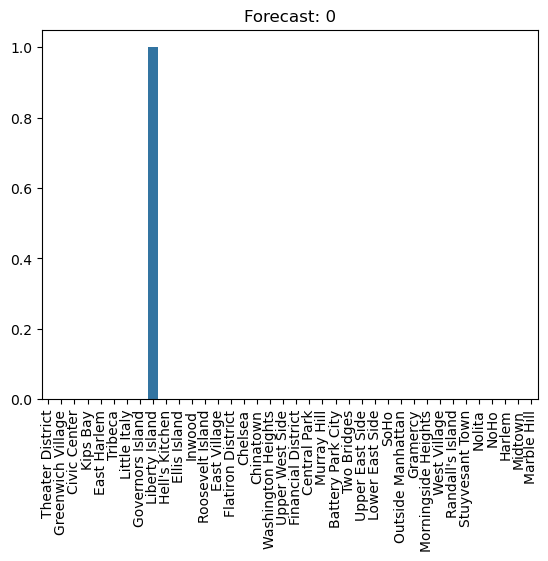

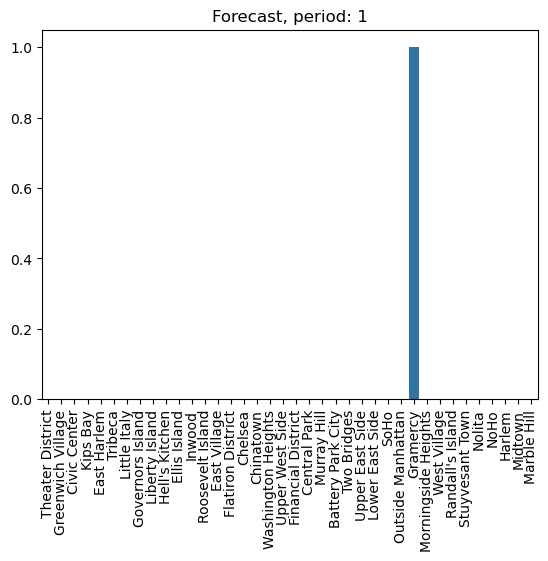

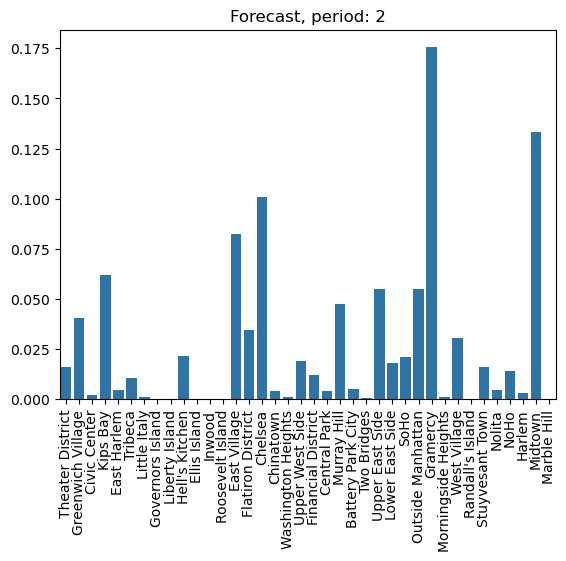

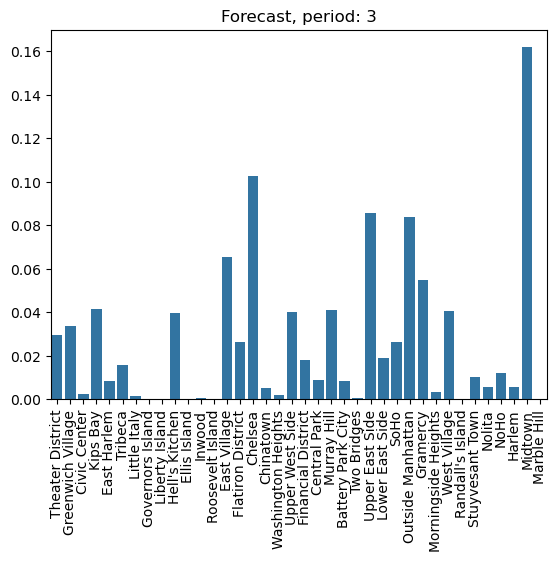

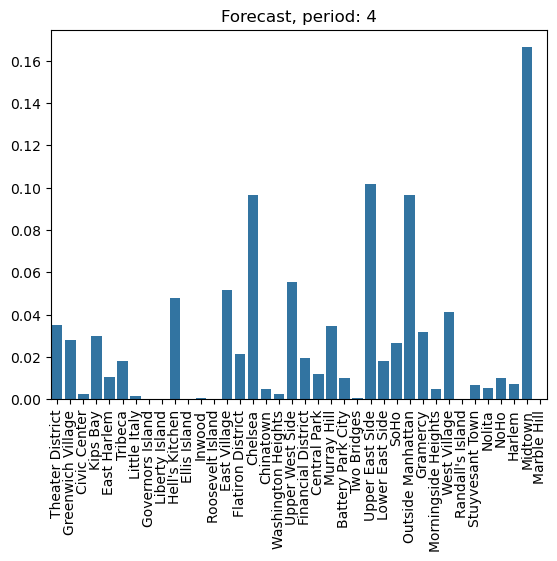

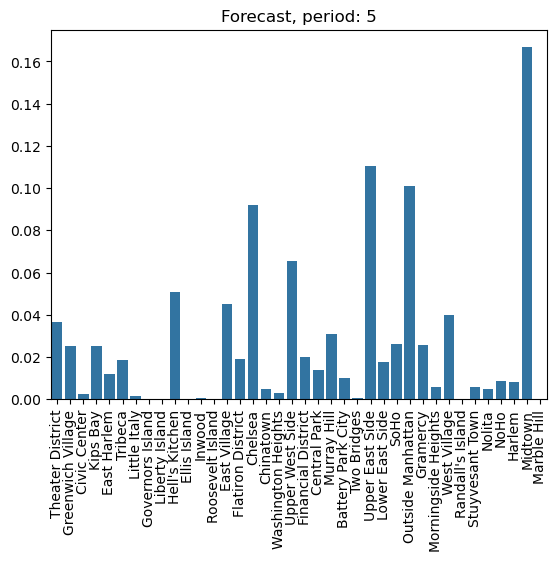

In [40]:
np.random.seed(100)

initial_state = np.random.choice(states) # Choose an initial state at random
state_index = states.index(initial_state) # Get the index of the initial state

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1

sns.barplot(x=states,y=density).set(title=f'Forecast: 0')
plt.xticks(rotation=90)
plt.show()

n_sim = 5

forecast = [initial_state]
for t in range(n_sim): 
    density = tr_pr @ density
    forecast.append(density) # Append new forecast
    sns.barplot(x=states,y=density).set(title=f'Forecast, period: {str(t+1)}')
    plt.xticks(rotation=90)
    plt.show()

By the 15th trip, the forecasting output is only moving 1millionth of a decimal point.

In [142]:
print(tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@starting_in_hk)
print(tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@tr_pr@starting_in_hk)

[2.18474375e-02 3.48822852e-04 3.86920681e-02 9.45946728e-03
 2.22178342e-02 2.21112456e-02 4.52296484e-04 3.65476687e-02
 4.63151264e-03 1.67758096e-01 1.77919788e-02 1.92274144e-02
 4.60964480e-03 1.21858167e-01 7.08795173e-03 8.61477978e-02
 2.84974677e-02 3.15923429e-03 4.84564680e-03 6.23355084e-04
 7.58998396e-03 2.52132491e-03 9.98095499e-03 1.38013444e-02
 3.80670314e-02 2.14722181e-05 2.39728495e-02 1.56919535e-04
 1.61224200e-02 1.02937156e-01 7.85624543e-02 5.22438345e-07
 1.72125971e-02 1.30629573e-07 5.33232205e-02 1.61342269e-02
 1.68023914e-03 4.35371645e-08]
[2.18487069e-02 3.48827901e-04 3.86954397e-02 9.45867279e-03
 2.22193837e-02 2.21120620e-02 4.52340329e-04 3.65501194e-02
 4.63200028e-03 1.67753809e-01 1.77937804e-02 1.92292085e-02
 4.61013277e-03 1.21850364e-01 7.08706108e-03 8.61495197e-02
 2.84978473e-02 3.15901636e-03 4.84599220e-03 6.23326002e-04
 7.59067915e-03 2.52156851e-03 9.98181577e-03 1.38003103e-02
 3.80658285e-02 2.14714150e-05 2.39751295e-02 1.56916